<a href="https://colab.research.google.com/github/vedanttule134/Netflix-Movies-And-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies And TV Shows Clustering**





##### **Project Type**    - Unsupervised
##### **Contribution**    - Team data warehouse
##### **Team Member 1 -**  Vedant Tule


# **Project Summary -**

Throughout this project, we conducted a wide variety of analyses and tasks to gain insights from the Netflix dataset. Here are the key steps we performed:

1. We began with importing the necessary libraries, loading the dataset, and performing data wrangling tasks.
2. Exploratory data analysis (EDA) was then conducted, including 15 visualization plots for univariate and bivariate analysis.
3. Two hypothesis tests were performed by assuming null and alternative hypotheses.
4. Moving forward, feature engineering and data pre-processing were carried out. This involved handling missing values, clustering attributes into a single column, and removing non-ASCII characters. Textual data pre-processing techniques were applied, such as expanding contractions, lowercasing, removing punctuation, URLs, words and digits containing digits, stopwords, and whitespace. Lemmatization, tokenization, and text vectorization techniques were also utilized. Before proceeding with clustering, dimensionality reduction techniques were applied to reduce the dataset's dimensionality.
5. K-means Clustering: We performed k-means clustering on the dataset, determining the optimal number of clusters using the elbow method and Silhouette score analysis.
6. Agglomerative Clustering: We applied Agglomerative clustering and visualized a dendrogram to determine the optimal number of clusters. This hierarchical clustering approach provided further insights into the dataset's structure.
7. We analyzed the resulting clusters and their sample sizes, gaining an understanding of the distribution of observations within each cluster.
8. Based on the findings, we drew meaningful insights for Netflix from a business perspective. These insights can guide content acquisition strategies, content recommendation systems, and strategic decision-making within the streaming industry.

Overall, these steps enabled us to explore the Netflix dataset, uncover patterns, and provide valuable insights that can support data-driven decision-making and enhance Netflix's content offerings.

# **GitHub Link -**

https://github.com/vedanttule134/Netflix-Movies-And-TV-Shows-Clustering/blob/f846748f85ba843a863ab37bed9eb81688da11ca/Netflix_Movies_And_TV_Shows_Clustering.ipynb

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

**In this project, you are required to do**

**• Exploratory Data Analysis**

**• Understanding what type content is available in different countries**

**• If Netflix has been increasingly focusing on TV rather than movies in recent years.**

**• Clustering similar content by matching text-based features**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
url='https://drive.google.com/file/d/1xJGllnE12mAggLuRo8b0oNSshUlG8GvF/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
actual_df = pd.read_csv(url)
df = actual_df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

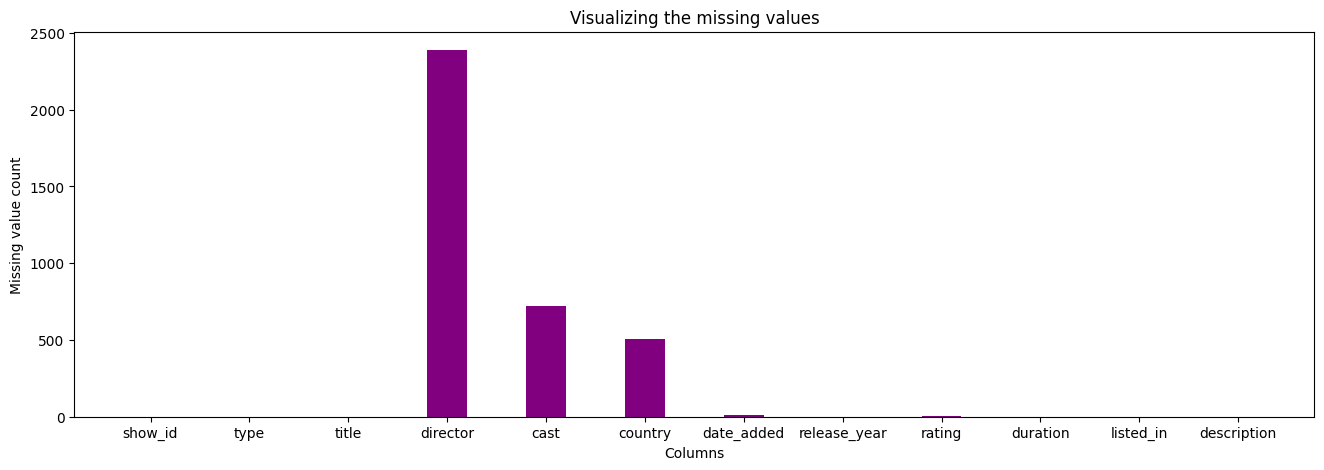

In [ ]:
# Visualizing the missing values
courses = list(df.columns)
values = list(df.isnull().sum())
fig = plt.figure(figsize = (16, 5))
plt.bar(courses, values, color ='purple',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The dataset has around 7787 rows and 12 columns. In columns like director, cast, country, date_added and rating there are several NaN values that we need to take care. Apart from that 11 columns out of 12 are categorical columns. We need to clean this data in order to make it ready for Exploratory Data Analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

show_id: 7787
type: 2
title: 7787
director: 4049
cast: 6831
country: 681
date_added: 1565
release_year: 73
rating: 14
duration: 216
listed_in: 492
description: 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

In Data Wrangling, we have to make our data EDA ready. For this we have fill all the missing values.

* We filled the missing values by creating a new category 'Unknown' for columns like director', 'cast', 'country'.

* For column 'rating' we filled it with the mode value of the columns.

Now after filling all the missing values we are good to proceed with the Data Visualization and EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1**

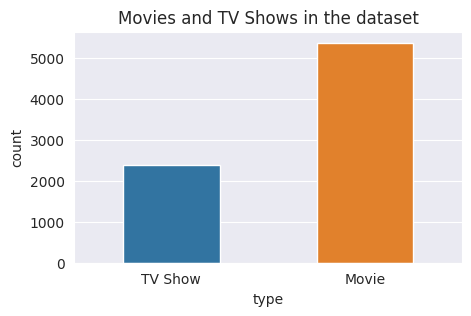

In [ ]:
# Chart - 1 visualization code
# Count plot for Number of Movies and TV Shows in the dataset
plt.subplots(figsize=(5, 3))

# Set the style to darkgrid
sns.set_style("darkgrid")

sns.countplot(x='type', data=df, width = 0.5)
plt.title('Movies and TV Shows in the dataset')
plt.show()

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

**The count of Movie is more than double the count of TV Show. Here are the following insights:**
1. The netflix viewers might have a higher demand for movies as compared to TV Show.
2. Most of the Movies might not be the Netflix original movies, they might have bought the copyrights for the Movie to stream on their platform.
3. Movies have a wide range of audience from all age group whereas TV Shows are mostly preferred by Young genration of the age group of 16 to 25 years.

#### **Chart - 2**

In [ ]:
# Chart - 2 visualization code
# Excluding the Unknown values which we filled while data wrangling
filtered_df = df[df['director'] != 'Unknown']

In [ ]:
# Chart - 2 visualization code
# Filtering the top 10 directors
top_10_directors = filtered_df['director'].value_counts().head(10)
top_10_directors = top_10_directors.reset_index()
top_10_directors.columns = ['director', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Raúl Campos, Jan Suter'),
  Text(1, 0, 'Marcus Raboy'),
  Text(2, 0, 'Jay Karas'),
  Text(3, 0, 'Cathy Garcia-Molina'),
  Text(4, 0, 'Youssef Chahine'),
  Text(5, 0, 'Martin Scorsese'),
  Text(6, 0, 'Jay Chapman'),
  Text(7, 0, 'Steven Spielberg'),
  Text(8, 0, 'David Dhawan'),
  Text(9, 0, 'Ryan Polito')])

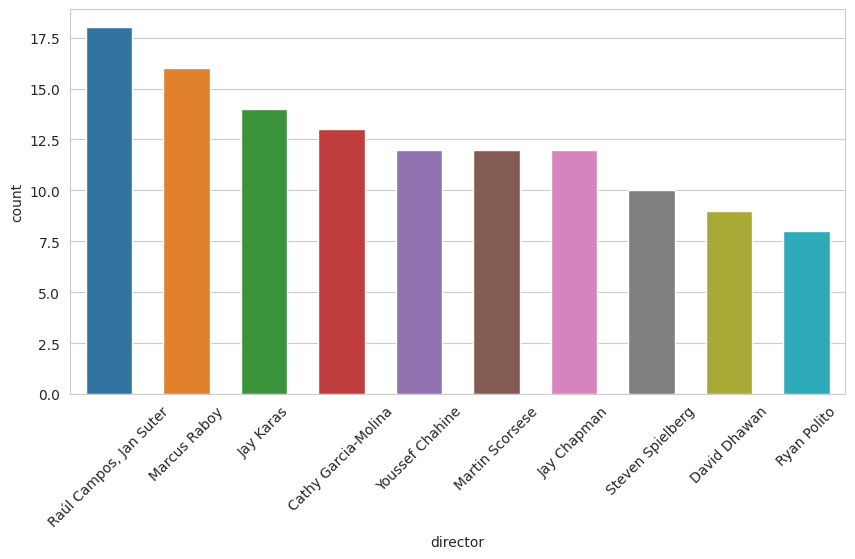

In [ ]:
# plotting Barplot for the top 10 directors
# Set the style to whitegrid
sns.set_style("whitegrid")

plt.subplots(figsize=(10, 5))
sns.barplot(x='director', y='count', data=top_10_directors, width = 0.6)

# Rotating the x-axis tick labels bu 345 degree
plt.xticks(rotation=45)

**In this, we plotted a bar graph for top 10 directors who has directed the most number of movies/TV Show. Here are the following insights:**


1. Raúl Campos and Jan Suter are the directors who have directed most number of movies i.e. 18 which is more than any other directors.
2. Marcus Raboy has done 16 movies which is the second highest and Jay Karas has done 14 movies which is the third highest among all the directors in the dataset.

#### **Chart - 3**

Text(0.5, 1.0, ' Top 10 countries with the highest number of Movies/TV Shows')

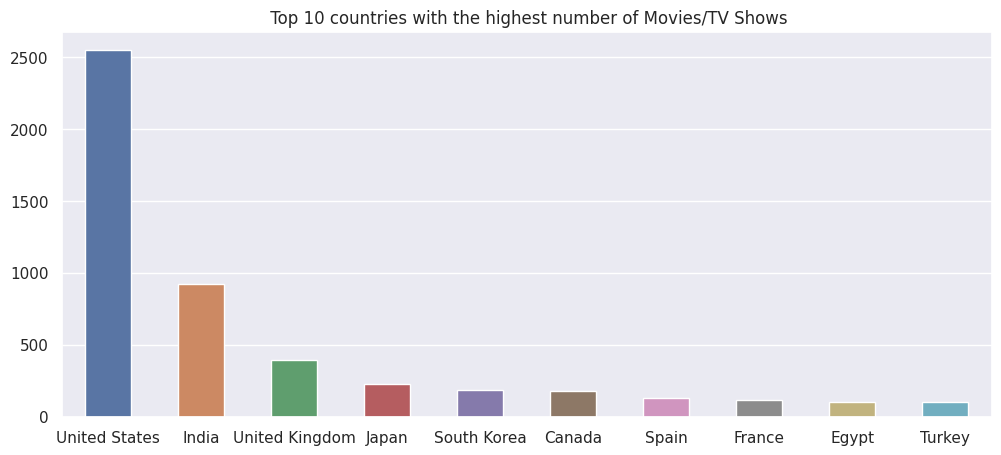

In [ ]:
# Chart - 3 visualization code
# Excluding 'Unkown' values before
plt.figure(figsize=(12,5))
top_10_countries = df[~(df['country']=='Unknown')].country.value_counts().nlargest(10)

# Set the style to darkgrid
sns.set(style="darkgrid")

# Plotting top 10 countries with the highest number of Movies/TV Shows
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, width = 0.5)
plt.title(' Top 10 countries with the highest number of Movies/TV Shows')

**In this, we plotted a bar graph for Top 10 countries with the highest number of Movies/TV Shows. Here are the following insights:**

1. United States is the leading producer of Movies/TV Shows in the world. Around 2500 Movies/TV Shows on Netflix are are from United States.
2. India is the second largest country in producing the number of Movies/TV Shows in the world. There are approximately 900 Movies/TV Shows listed on the Netflix platform are from India.
3. United Kingdom is the third largest and South Korea is fourth largest producer of Movies/TV Shows on Netflix. Other countries like Canada, Spain, France, Egypt and Turkey are in the list of top 10 countries which are the leading producers of Movies/TV Shows.

#### **Chart - 4**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

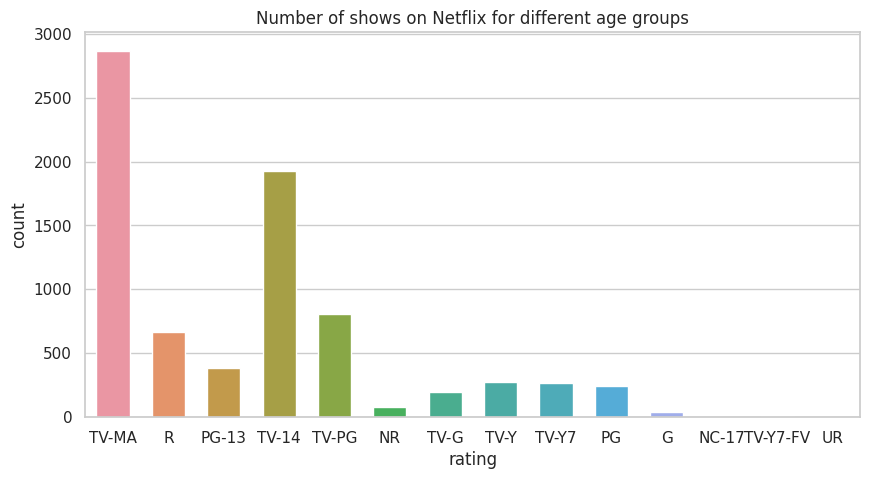

In [ ]:
# Chart - 4 visualization code
# Set the style to white
sns.set(style="whitegrid")

# Number of shows on Netflix for different age groups
plt.subplots(figsize=(10, 5))
sns.countplot(x='rating', data=df, width = 0.6)
plt.title('Number of shows on Netflix for different age groups')

In [ ]:
df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

**Below are the insights we draw from the count plot of Number of shows on Netflix for different age groups:**

1. The most common rating for shows on Netflix is 'TV-MA' (Mature Audience) with a count of 2868. This suggests that there is a significant amount of content intended for adult viewers with an age of 18 plus.
2. The second most common rating is 'TV-14' with a count of 1928. This indicates that there is also a considerable selection of shows suitable for teenagers and older children. THe Shows that falls in this are watched by an age group of 14 to 20.
3. The countplot provides a visual representation of the distribution of shows across different age groups, allowing for a quick understanding of the relative abundance of content for each rating category.


#### **Chart - 5**

In [ ]:
# Chart - 5 visualization code
# Using Lambda function
# Extracting the year, month, and day information and storing them in new columns.
df['date_added']=pd.to_datetime(df['date_added'])
df['Year'] = df['date_added'].apply(lambda x: x.year)
df['Month'] = df['date_added'].apply(lambda x: x.month)
df['Day'] = df['date_added'].apply(lambda x: x.day)

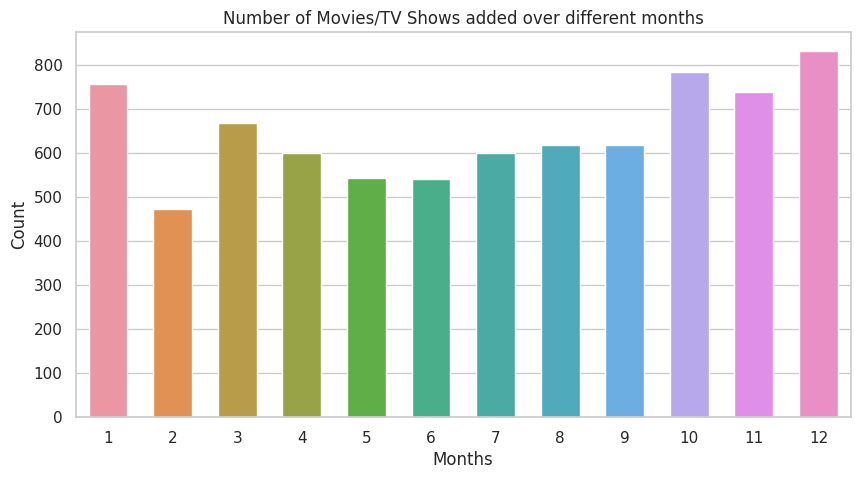

In [ ]:
# Plotting a countplot for Number of Movies/TV Shows added over different months
plt.subplots(figsize=(10, 5))
sns.set(style="darkgrid")
sns.countplot(x='Month', data=df, width = 0.6)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Number of Movies/TV Shows added over different months')
plt.show()

**We plotted a countplot for distribution of movies released in each month. We draw the following insights:**

1. In the months starting from October to January the most number of Movies/TV Shows are been released. This period of 4 months can be called as the peak period for the entertainment industry.
2. The lowest number of movies are been released in the month of february. There is not a big difference between lowest and highest month of the release count of movies which shows that the release count of movies on Netflix is relatively consistent throughout the year. This suggests that Netflix does not show a significant seasonal pattern in terms of movie releases.


#### **Chart - 6**

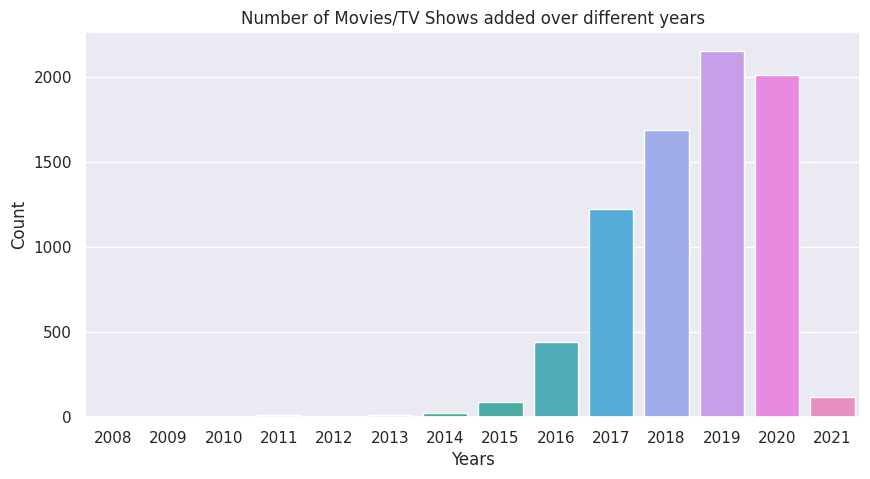

In [ ]:
# Chart - 6 visualization code
# Plotting a countplot for Number of Movies/TV Shows added over different years
plt.subplots(figsize=(10, 5))
sns.set(style="darkgrid")
sns.countplot(x='Year', data=df)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Number of Movies/TV Shows added over different years')
plt.show()

**We plotted a countplot for distribution of movies released in each year. We draw the following insights:**

1. The highest number of movies/TV shows added to Netflix was in the year 2019 and the highest year is 2020.
2. We can observe a slight scale-down of shows in the year 2020 compared to 2019, and the most likely reason for this decline appears to be COVID-19.
3. From the years 2014 to 2019, there was exponential growth in the number of movies and TV shows released each year. This growth indicates that the content on Netflix is appreciated by the audience. The increasing number of releases reflects the growing demand for diverse and engaging content on the Netflix platform.

#### **Chart - 7**

In [ ]:
# Chart - 7 visualization code
# Finding value counts of the column 'listed_in'
df['listed_in'].value_counts()[0:10]

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Top 10 Movie Genre in the dataset')

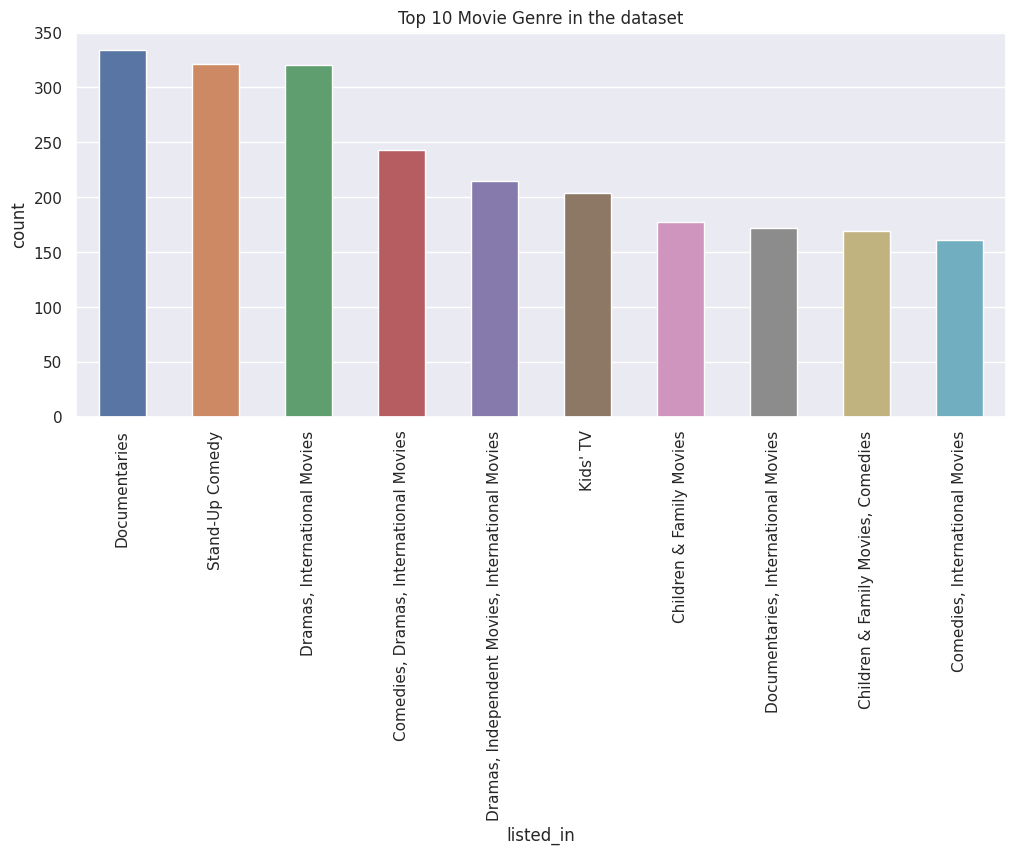

In [ ]:
# Plotting countplot for Top 10 Movie Genre in the dataset
plt.figure(figsize=(12,5))
sns.countplot(x=df['listed_in'],data=df,order=df['listed_in'].value_counts().index[0:10], width = 0.5)
plt.xticks(rotation=90)
plt.title('Top 10 Movie Genre in the dataset')

**Following are the insights for the Top 10 Movie Genre in the dataset:**

1. Documentaries and Stand-Up Comedy have the highest counts, with 334 and 321 occurrences, respectively. This suggests that there is a significant audience interest in factual content and comedic performances.
2. The combination of Dramas and International Movies appears in multiple variations in the top 10 genres, including "Dramas, International Movies," "Dramas, Independent Movies, International Movies," and "Comedies, Dramas, International Movies." This indicates a strong preference for emotionally engaging narratives and films from various cultures.
3. Children & Family Movies and Kids' TV are present in the top 10 genres, indicating a demand for content suitable for younger audiences. Combining Children & Family Movies with Comedies further emphasizes the interest in light-hearted, family-friendly entertainment.

#### **Chart - 8**

Text(0.5, 1.0, 'Distribution of movies and TV shows over different years')

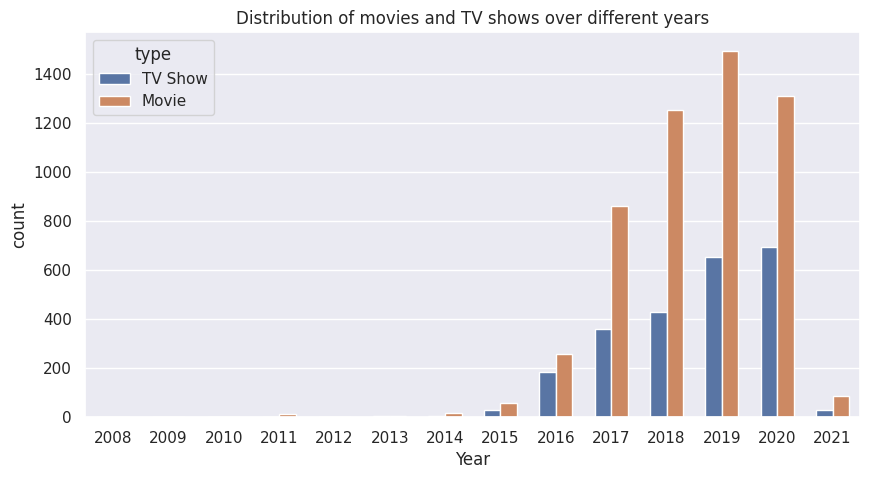

In [ ]:
# Chart - 8 visualization code
# Plotting countplot for Distribution of movies and TV shows over different years
plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'], hue=df['type'], width = 0.6)
plt.title('Distribution of movies and TV shows over different years')

**We plotted a double bar graph of distribution of Movies and TV Shows for every year:**

1. The difference between Movies and TV Shows is every high which shows that Movies are more in demand for the netflix audience,
2. The reason why movies are more preferred because Movies, typically featuring a self-contained narrative within a limited duration, may attract individuals who prefer a complete and immersive storytelling experience in a single sitting. On the other hand, TV shows with their episodic format and longer story arcs cater to viewers who enjoy ongoing engagement, character development, and the anticipation of new episodes.









#### **Chart - 9**

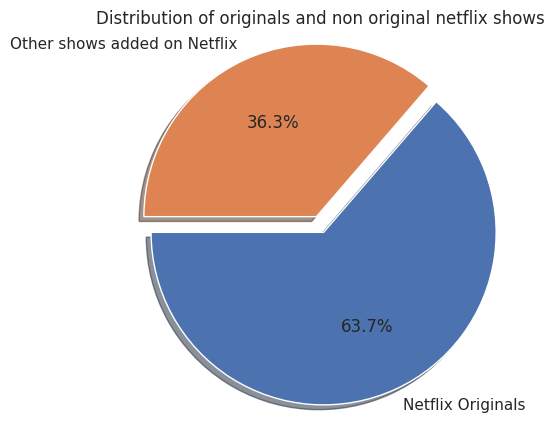

In [ ]:
# Chart - 9 visualization code
# Pie Chart showing Distribution of originals and non original netflix shows
labels = 'Netflix Originals', 'Other shows added on Netflix'
df['Netflix Originals'] = np.where(df['release_year'] == df['Year'], 'Yes', 'No')
sizes = df['Netflix Originals'].value_counts()
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Distribution of originals and non original netflix shows")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

**The above Pie Chart shows:**

1. Netflix Originals which depicts 63.7% of the pie are the movies originally produced under Netflix production whereas rest of the pie are Other shows added on Netflix which is 36.3%.Netflix have bought rights of these kind of of to release it on their platform.
2. By acquiring rights to external shows, Netflix expands its offerings to cater to a wider range of audience preferences.
3. The dominance of Netflix Originals, comprising nearly two-thirds of the pie, highlights Netflix's strategic emphasis on producing and releasing its own content. This indicates that Netflix invests significantly in creating exclusive movies and shows, aiming to provide unique and engaging content to its subscribers.


#### **Chart - 10**

In [ ]:
#Assigning the Ratings into grouped categories like 'Older Kids','Adults','Teens','Kids'.
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# Assigning the new 'target_ages' column with new rating as per above classification
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# Chart - 10 visualization code
# Grouped the DataFrame df by the 'country' column and summed the values of the 'count' column for each group
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:11]
data = data['country']

#Filtering the countries in the Dataframe
df_heatmap = df.loc[df['country'].isin(data)]

# Calculating a cross-tabulation between the 'country' and 'target_ages' columns
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
target_ages,,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.368889,0.77,0.469945,0.835821,0.512626,0.502942,0.320158
Kids,0.180791,0.000000,0.095652,0.016251,0.008889,0.02,0.027322,0.022388,0.093434,0.073362,0.169960
Older Kids,0.225989,0.039604,0.060870,0.160347,0.271111,0.07,0.120219,0.044776,0.204545,0.187132,0.235178
Teens,0.146893,0.683168,0.165217,0.567714,0.351111,0.14,0.382514,0.097015,0.189394,0.236563,0.274704


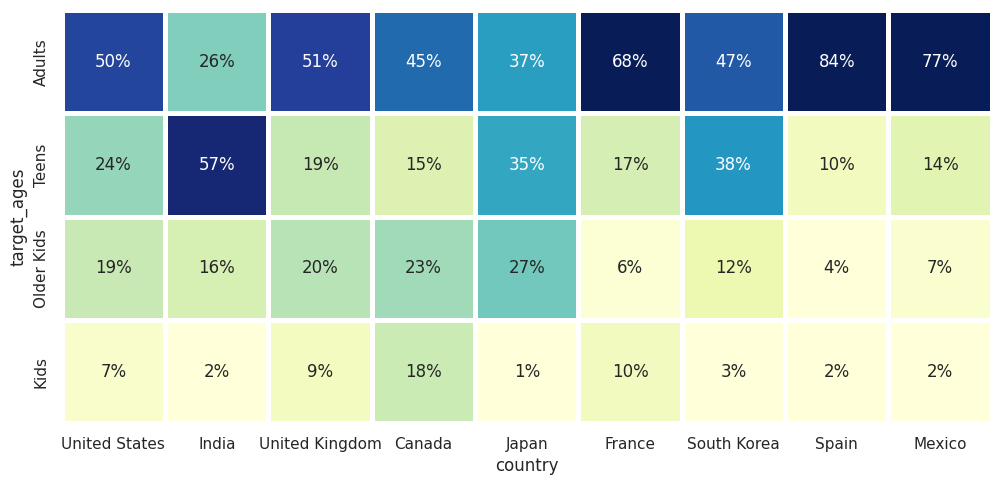

In [ ]:
# Plotting the heatmap between target_ages and country
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**The heatmap reveals that different countries exhibit distinct patterns in terms of target age preferences for content.**

1. Spain, Mexico, and France have a very high correlation with the 'Adults' target age category on the heatmap. This suggests that these countries have a significant proportion of content specifically tailored for adult audiences.
2. India has a very high correlation with the 'Teens' target age category on the heatmap, indicating that this country has a significant proportion of content specifically catered to teenage audiences. The strong correlation suggests that content tailored for teens is popular and in demand within India.
3. Canada is the country that exhibits a relatively balanced correlation across all target age groups on the heatmap. This suggests that content preferences in Canada are diverse and spread evenly across different age categories. Similarly we can see the variation for all the countries mentioned in the heatmap.

#### **Chart - 11**

In [ ]:
# Chart - 11 visualization code
# Filtering movie from the dataset
movies = df[df['type']=='Movie']

In [ ]:
# Convert duration values to numeric (removing 'min' suffix)
movies = movies['duration'].str.replace(' min', '').astype(int)

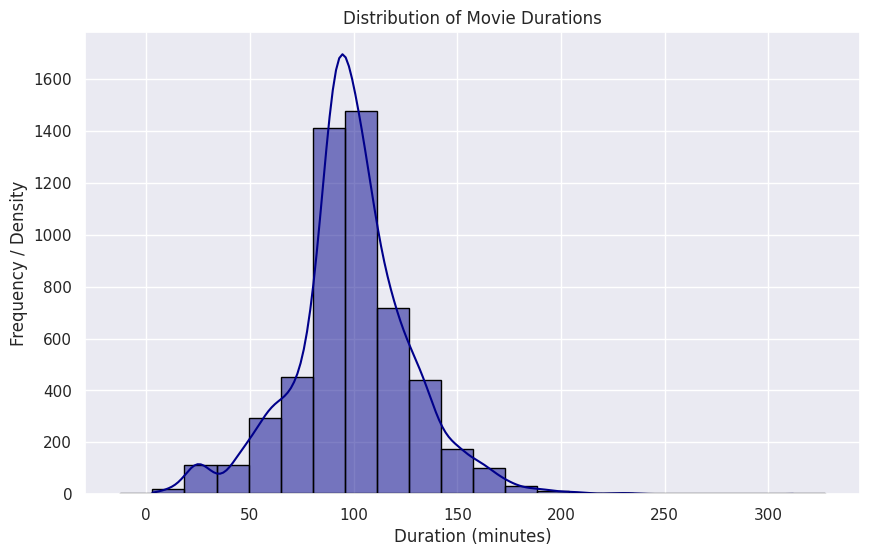

In [ ]:
# Plotting histogram and KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(movies, bins=20, kde=True, color='darkblue', edgecolor='black')
sns.kdeplot(movies, color='black', linewidth=2)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Movie Durations')
plt.show()

**From the above visualization, we can draw the following insights:**

1. The highest peak in the histogram or the point of maximum density in the KDE curve represents the most common movie duration. The highest peak of duration foe netflix movies is around 100 minutes.
2. The range of duration from 50 to 150 is the most common range for the duration for the movies. There are very few movies outside this range.


#### **Chart - 12**

In [ ]:
# Chart - 12 visualization code
df['duration'] = df[df['type']=='TV Show']['duration'].apply(lambda x: int(x.split()[0]))

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

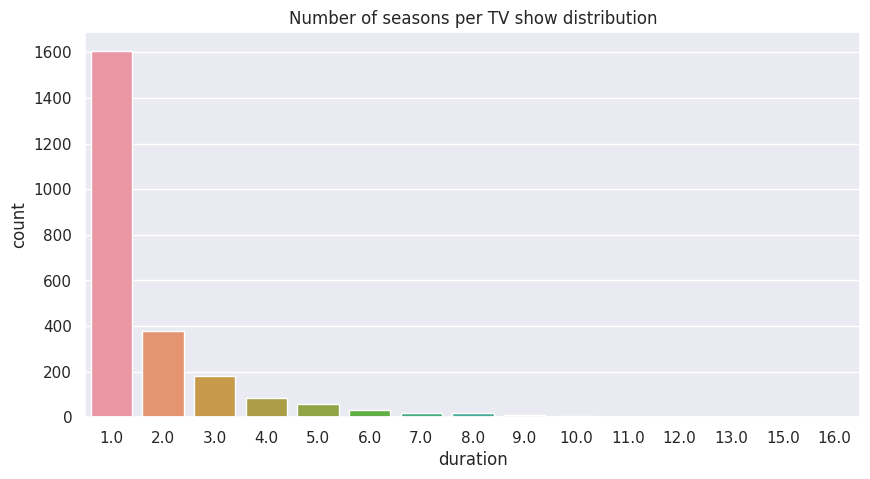

In [ ]:
# Number of seasons for tv shows
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

**From the above visualization, we can draw the following insights:**

1. Around 75% of the TV Shows on Netflix don't have second season. The reason behind this might be low viewership and popularity or Creative and storytelling choices.
2. Around 400 TV Shows have a second season and and around 200 TV shows have third season, it suggests that these particular shows have managed to garner enough viewership, popularity, and success to justify the production of multiple seasons.
3. Very few TV Shows have 6, 7 or even 8 season, it suggests that these TV shows had managed to sustain their popularity and retain a dedicated fan base for multiple seasons.
4. Maintaining the quality of highest level for 7-8 season is very difficult and this is the reason very few TV Shows are successful in doing this difficult task.

#### **Chart - 13**

In [ ]:
# Chart - 13 visualization code
# Top actors for movies
# Filter movies with known cast
movies_with_known_cast = df[(df['cast'] != 'Unknown') & (df['type'] == 'Movie')]

In [ ]:
# Get value counts of actors and select top 10
top_actors = movies_with_known_cast['cast'].value_counts().nlargest(10)

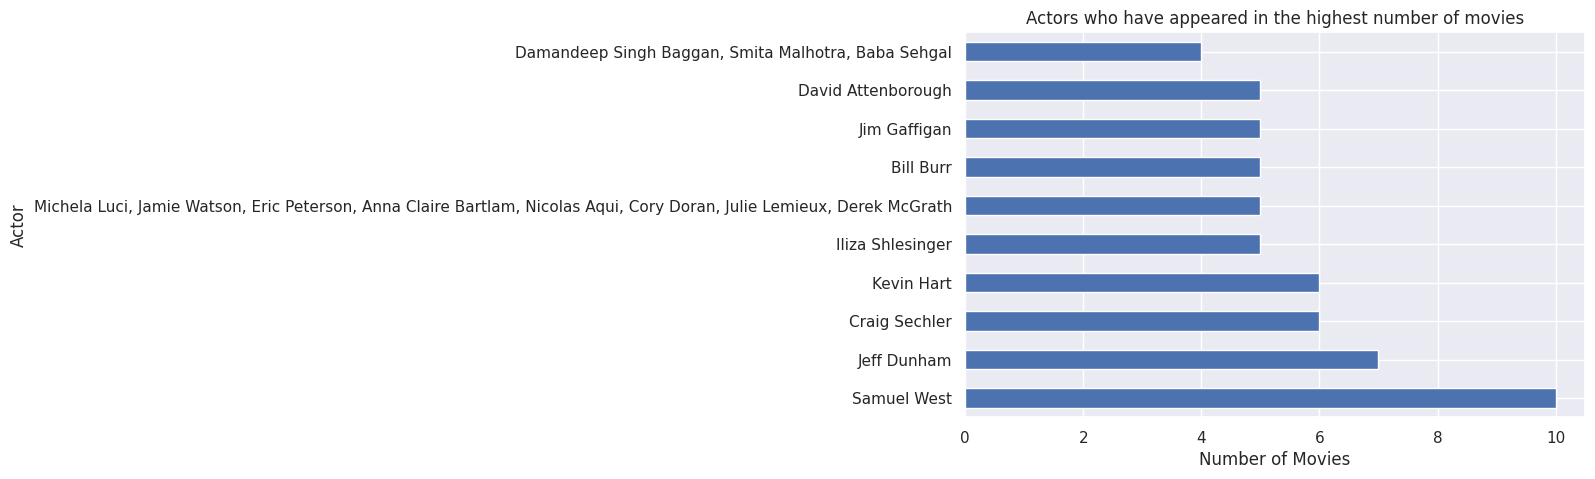

In [ ]:
# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
top_actors.plot(kind='barh')
plt.title('Actors who have appeared in the highest number of movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

**From the above visualization, we can draw the following insights:**

1. Samuel West is the actor who appeared most number of Movies on Netflix.
2. Actors like Jeff Dunham, Craig Scehler, Kevin Hart and Iliza Shlesinger has done five or movies which are on netflix.

#### **Chart - 14**

In [ ]:
# Chart - 14 visualization code
# Top actors for TV Show
# Filter TV Show with known cast
TV_Show_with_known_cast = df[(df['cast'] != 'Unknown') & (df['type'] == 'TV Show')]

In [ ]:
# Get value counts of actors and select top 10
top_actors = TV_Show_with_known_cast['cast'].value_counts().nlargest(10)

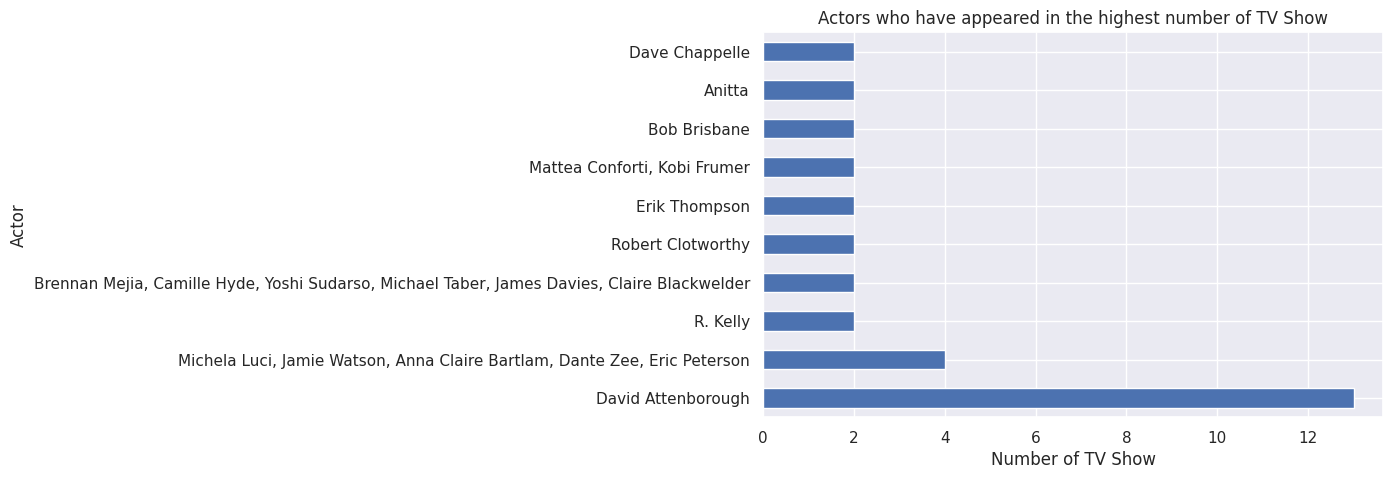

In [ ]:
# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
top_actors.plot(kind='barh')
plt.title('Actors who have appeared in the highest number of TV Show')
plt.xlabel('Number of TV Show')
plt.ylabel('Actor')
plt.show()

**From the above visualization, we can draw the following insights:**

1. David Attenborough is the who has appeared in 13 TV Shows on netflix which is the most for any actor.
2. Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee and Eric Peterson are the actor who has appeared on 4 TV Shows which is second most among all actors.

#### **Chart - 15**

In [ ]:
# Chart - 15 visualization code
# Filter movie and TV show data after 2000
movies_data = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)]
tv_shows_data = df[(df['type'] == 'TV Show') & (df['release_year'] >= 2000)]

In [ ]:
# Calculate movie and TV show counts by release year
movie_counts_by_year = movies_data['release_year'].value_counts().sort_index()
tv_show_counts_by_year = tv_shows_data['release_year'].value_counts().sort_index()

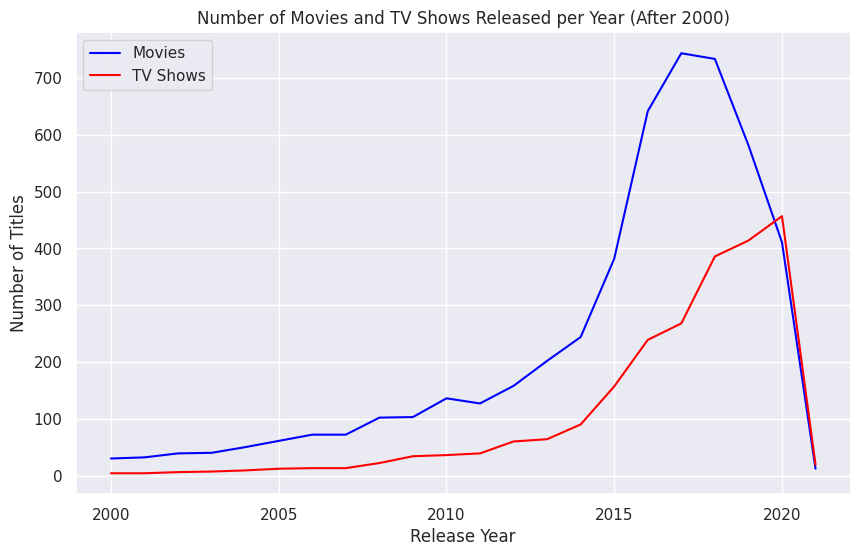

In [ ]:
# Plot line plots
plt.figure(figsize=(10, 6))
plt.plot(movie_counts_by_year.index, movie_counts_by_year.values, linestyle='-', color='blue', label='Movies')
plt.plot(tv_show_counts_by_year.index, tv_show_counts_by_year.values, linestyle='-', color='red', label='TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies and TV Shows Released per Year (After 2000)')
plt.legend()
plt.grid(True)
plt.show()

**We filtered and visualize number of Movies and TV Shows released based on their relaese yearand from the visualization, we can draw the following insights:**

1. The number of movies released per year shows a general increasing trend from 2000 to 2017, with a peak of 744 movies in 2017. However, after 2017, there is a gradual decline in movie releases, with a notable drop to 12 movies in 2021. This suggests a potential shift or change in the movie industry landscape.
2. The count of TV shows released per year displays a consistent growth pattern over the years. The number of TV shows has been steadily increasing, with a substantial rise from 157 shows in 2015 to 457 shows in 2020. This indicates a growing popularity and demand for TV series content.

## ***5. Hypothesis Testing***

# ***Hypothetical Statement - 1***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 * ***HO: There is no significant difference in the distribution of release years between movies and TV shows on Netflix.***
 * ***H1: There is a significant difference in the distribution of release years between movies and TV shows on Netflix.***








#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
df_hypothesis=actual_df.copy()

In [ ]:
from scipy.stats import chi2_contingency

release_year = df_hypothesis['release_year']
type = df_hypothesis['type']

In [ ]:
# Creating a contingency table
contingency_table = pd.crosstab(release_year, type)

In [ ]:
# Performing the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [ ]:
# Printing the p-value
print("p-value:", p_value)

p-value: 1.7506909615749571e-60


In [ ]:
# Setting the significance level
alpha = 0.05

In [ ]:
# Checking if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis as there is a significant difference in the distribution of release years between movies and TV shows.")
else:
    print("Fail to reject the null hypothesis as there is no significant difference in the distribution of release years between movies and TV shows.")

Reject the null hypothesis as there is a significant difference in the distribution of release years between movies and TV shows.


**Which statistical test have you done to obtain P-Value?**

The statistical test used to obtain the p-value is the chi-square test.

**Why did you choose the specific statistical test?**

The chi-square test was chosen in this case because it is commonly used to determine if there is a significant association or difference between two categorical variables. In this hypothesis test, we are comparing the distribution of release years (categorical variable) between movies and TV shows (categorical variable) on Netflix. The chi-square test allows us to assess whether the observed differences in the contingency table are statistically significant or if they can be attributed to chance alone. By calculating the chi-square test statistic and corresponding p-value, we can make conclusions about the presence or absence of a significant difference in the distribution of release years between movies and TV shows.

# ***Hypothetical Statement - 2***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 * ***HO: movies rated for kids and older kids are at least two hours long.***
 * ***H1: movies rated for kids and older kids are not at least two hours long.***








#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
df_hypothesis=actual_df.copy()

In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [ ]:
# Select the relevant subset of data for movies rated for kids and older kids
subset = df_hypothesis[df_hypothesis['target_ages'].isin(['Kids', 'Older Kids'])]

In [ ]:
# Extract the duration of movies rated for kids and older kids
duration = subset['duration']

In [ ]:
from scipy.stats import ttest_1samp

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(duration, 120, alternative='less')

# Print the p-value
print("p-value:", p_value)

p-value: 1.114832932563425e-177


In [ ]:
# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis as Movies rated for kids and older kids are not at least two hours long.")
else:
    print("Fail to reject the null hypothesis as Movies rated for kids and older kids are at least two hours long.")

Reject the null hypothesis as Movies rated for kids and older kids are not at least two hours long.


**Which statistical test have you done to obtain P-Value?**

The statistical test used to obtain the p-value is the one-sample t-test.

**Why did you choose the specific statistical test?**

The one-sample t-test was chosen in this case because it allows us to compare the mean duration of movies rated for kids and older kids to a specific value (two hours, or 120 minutes) and determine if it is significantly different. The t-test assumes a normal distribution of the data and is appropriate when working with continuous variables. By calculating the t-statistic and corresponding p-value, we can assess whether the mean duration of movies rated for kids and older kids is significantly less than two hours or not.

## ***6. Feature Engineering & Data Pre-processing***

### ***1. Handling Missing Values***

In [ ]:
# creating a copy of actual dataset
netflix_df = actual_df.copy()

In [ ]:
# Filling the missing values with an empty string
netflix_df.fillna('',inplace=True)

We created a copy of actual dataset to further proceed with Feature Engineering & Data Pre-processing. In handling missing values, we filled all the missing values with an empty string to ensure that all data points have a valid categorical representation, enabling compatibility with these algorithms.

### ***2. clustering attributes into a single column***

When combining columns for clustering, it is essential to select columns that are relevant and meaningful for the analysis. We will cluster the shows on Netflix based on 6 attributes, they are Director, Cast, Country, Listed_in and Description. These are the columns we consider as the most meaning for analysis.

In [ ]:
# Combining all the clustering attributes into a single column

netflix_df['clustering_attributes'] = (netflix_df['type'] + ' ' +
                                netflix_df['director'] + ' ' +
                                netflix_df['cast'] + ' ' +
                                netflix_df['country'] +' ' +
                                netflix_df['listed_in'] +' ' +
                                netflix_df['description'])

We have clustered 7 different feaures into a single column named as clustering_attributes. The purpose of creating this new column 'clustering_attributes' is likely to create a consolidated representation of multiple attributes from the dataset that can be used as input for a clustering algorithm or further analysis. By combining these attributes into a single column, you can potentially capture relationships and patterns across multiple features in the dataset, enabling clustering or similarity-based analysis.

### ***3. Removing non-ASCII characters:***

In [ ]:
# function to remove non-ascii characters
import unicodedata
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# remove non-ascii characters
netflix_df['clustering_attributes'] = remove_non_ascii(netflix_df['clustering_attributes'])

Removing non-ASCII characters refers to the process of eliminating any characters that are not part of the ASCII (American Standard Code for Information Interchange) character set from a text or string. The ASCII character set includes a range of 128 characters, including uppercase and lowercase letters, digits, punctuation marks, and control characters.

### ***4. Textual Data Preprocessing***
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

## ***Natural Language Processing(NLP)***

#### ***1. Expand Contraction***

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.9 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(expand_contractions)

This will iterate over each value in the clustering_attributes column and expand any contractions present, updating the values in the DataFrame accordingly.

#### ***2. Lower Casing***

In [ ]:
# Lower Casing
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].str.lower()

It will convert all the text in the clustering_attributes column to lowercase. It ensures that the text is in a consistent case for further processing or analysis.

#### ***3. Removing Punctuations***

In [ ]:
# Remove Punctuations
# Function to remove punctuation from a string
import string
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Removing punctuation marks
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_punctuation)

It will remove all punctuation marks from the values in the clustering_attributes column of the DataFrame, effectively cleaning the text data by eliminating any punctuation that may not be relevant for the analysis.

#### ***4. Removing URLs & Removing words and digits contain digits***

In [ ]:
# Remove URLs & Remove words and digits contain digits
# Function to remove URLs
import re
def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", "", text)

# Remove URLs
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_urls)

It will remove any URLs present in the values of the clustering_attributes column by substituting them with an empty string. It helps in cleaning the text data by eliminating any URLs that may not be relevant for the analysis.

In [ ]:
# Function to remove words/digits containing digits
def remove_words_with_digits(text):
    return re.sub(r"\w*\d\w*", "", text)

# Remove words/digits containing digits
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_words_with_digits)

By applying this function to the clustering_attributes column, any words or digits that contain digits will be removed from the text data, further refining the preprocessing steps.

#### ***5. Removing Stopwords & Removing White spaces***

In [ ]:
# Remove Stopwords
# Function to remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Remove stopwords
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


By applying this function, common stopwords in the English language will be removed from the text data in the clustering_attributes column, further refining the preprocessing steps.

In [ ]:
# Remove White spaces
def remove_whitespace(text):
    return " ".join(text.split())

# Remove whitespace
netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(remove_whitespace)

By applying this function, any excessive white spaces within the text data in the clustering_attributes column will be removed, further refining the preprocessing steps.

#### ***6. Lemmatization***

In [ ]:
# Lemmatization words
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize_verbs(words):

    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

# Lemmatization
netflix_df['clustering_attributes'] = lemmatize_verbs(netflix_df['clustering_attributes'])

[nltk_data] Downloading package wordnet to /root/nltk_data...


By applying this function, the words in the clustering_attributes column will be lemmatized, which means reducing them to their base or dictionary form based on their part of speech.
* From Natural Language Toolkit(NLTK) library we downloaded the WordNet corpus and imported the WordNetLemmatizer class from the nltk.stem module which is the requirement for the lemmatization process.

* In lemmatization process we defined a function 'lemmatize_verbs' which takes a list of words as input and returns a list of lemmatized words. We applied this technique on the 'clustering_attributes' variable. The purpose of this NLP technique is to perform lemmatization specifically for verbs. It initializes the lemmatizer, applies it to each word in the input list, and returns a list of lemmatized verbs.

#### ***7. Tokenization***

In [ ]:
# Tokenization
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

netflix_df['clustering_attributes'] = netflix_df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

By applying this code, the text in the clustering_attributes column will be tokenized, splitting it into individual tokens or words. The resulting tokens will be stored as a list for each value in the column.

#### ***4.8. Text Vectorization***

In [ ]:
# Vectorizing Text
# clustering tokens saved in a variable
clustering_data = netflix_df['clustering_attributes']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Create a function called identity_tokenizer that simply returns the text as is.
def identity_tokenizer(text):
    return text

# Create an instance of the TfidfVectorizer class, tfidf with the several parameters
# lowercase=False to preserve the case of the tokens.
# max features = 20000 to prevent system from crashing
# stop_words='english' to remove common English stop words from the text.
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)

# fit the vectorizer on the data and transforms it into a matrix representation.
X = tfidf.fit_transform(clustering_data)

We created an instance of the TfidfVectorizer class, tfidf, with the following parameters:

1. tokenizer: Set it to the identity_tokenizer function to use the tokens as they are without any additional processing.
2. stop_words: Set it to 'english' to remove common English stop words from the text.
3. lowercase: Set it to False to preserve the case of the tokens.
4. max_features: Set it to 20000 to prevent system from crashing

In [ ]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 239727 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of X
X.shape

(7787, 20000)

In [ ]:
# convert X into array form for clustering
X = X.toarray()

By applying this code, the tokens in the clustering_attributes column will be vectorized using TF-IDF, resulting in a matrix representation where each row corresponds to a document (row in clustering_data) and each column corresponds to a feature (unique token). The resulting matrix X will be a dense array representation of the TF-IDF vectors.

### ***5. Dimesionality Reduction***

## ***Feature Extraction by Principle Component Analysis (PCA)***


In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# Fit the PCA model to the TF-IDF matrix X using the fit() method.
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

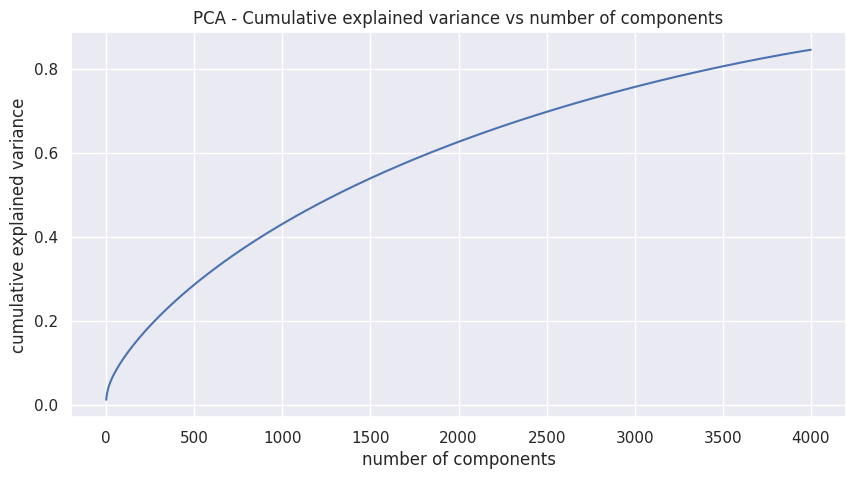

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

By applying PCA, the algorithm identifies the principal components that capture the most significant variance in the TF-IDF matrix X. These principal components can be considered as a reduced set of dimensions that still retain most of the important information in the original data.

The variable x_pca now contains the transformed features with reduced dimensions (4000 in this case) obtained through PCA. These transformed features can be used for further analysis or modeling.

## ***7. ML Model Implementation***

### **ML Model - 1 - K-Means Clustering**

In [ ]:
# ML Model - 1 Implementation
# Finding value of wcss for 1 to 30 range of number of clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,31):
  km = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  km.fit(x_pca)
  wcss.append(km.inertia_)

In [ ]:
# we stored clusters and wcss score in a dataframe
k = range(1,31)
df1 = pd.DataFrame({'Clusters': k, 'WCSS': wcss})
df1

,Clusters,WCSS
0,1,6496.863530
1,2,6410.323637
2,3,6388.462236
3,4,6366.889973
4,5,6349.697730
5,6,6341.867874
6,7,6321.742597
7,8,6312.503552
8,9,6298.448312
9,10,6288.910769


**This DataFrame can be used to analyze and visualize the relationship between the number of clusters and the WCSS scores to determine the optimal number of clusters for your clustering task. We have also plot the Elbow Curve to analyse the optimal number of clusters.**

Text(0, 0.5, 'WCSS')

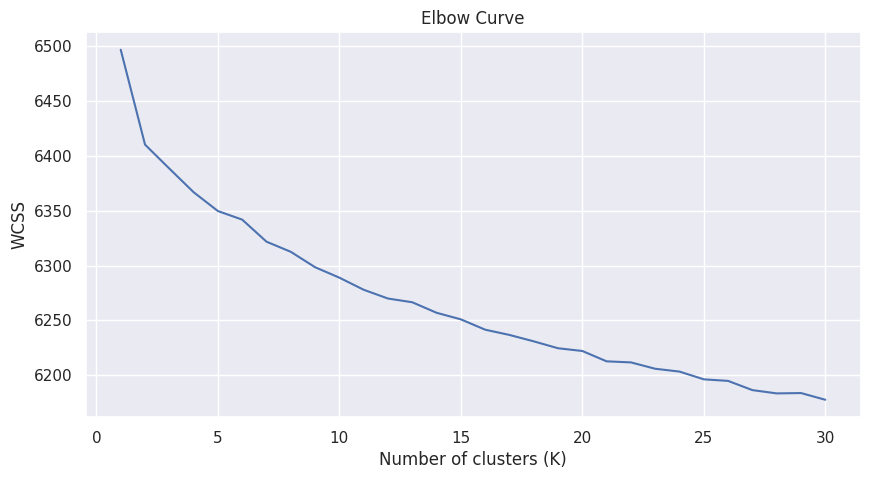

In [ ]:
# Plotting an Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(k,wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')

**From the above plot there is no clear elbow point in the WCSS plot where the rate of decrease significantly changes. This lack of a clear elbow point indicates that there is no distinct optimal number of clusters.**



In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill_score = []
for i in range(2,31):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(x_pca)
    cluster_labels = model.labels_

    # silhouette score
    score = silhouette_score(x_pca, cluster_labels)
    sill_score.append(score)
    print('cluster: %d \t Silhouette: %0.4f'%(i,score))

cluster: 2 	 Silhouette: 0.0097
cluster: 3 	 Silhouette: 0.0105
cluster: 4 	 Silhouette: 0.0118
cluster: 5 	 Silhouette: 0.0062
cluster: 6 	 Silhouette: 0.0062
cluster: 7 	 Silhouette: 0.0080
cluster: 8 	 Silhouette: 0.0065
cluster: 9 	 Silhouette: 0.0020
cluster: 10 	 Silhouette: 0.0068
cluster: 11 	 Silhouette: 0.0031
cluster: 12 	 Silhouette: 0.0038
cluster: 13 	 Silhouette: 0.0038
cluster: 14 	 Silhouette: 0.0048
cluster: 15 	 Silhouette: 0.0056
cluster: 16 	 Silhouette: 0.0055
cluster: 17 	 Silhouette: 0.0057
cluster: 18 	 Silhouette: 0.0057
cluster: 19 	 Silhouette: 0.0064
cluster: 20 	 Silhouette: 0.0062
cluster: 21 	 Silhouette: 0.0052
cluster: 22 	 Silhouette: 0.0058
cluster: 23 	 Silhouette: 0.0060
cluster: 24 	 Silhouette: 0.0075
cluster: 25 	 Silhouette: 0.0062
cluster: 26 	 Silhouette: 0.0063
cluster: 27 	 Silhouette: 0.0073
cluster: 28 	 Silhouette: 0.0067
cluster: 29 	 Silhouette: 0.0074
cluster: 30 	 Silhouette: 0.0064


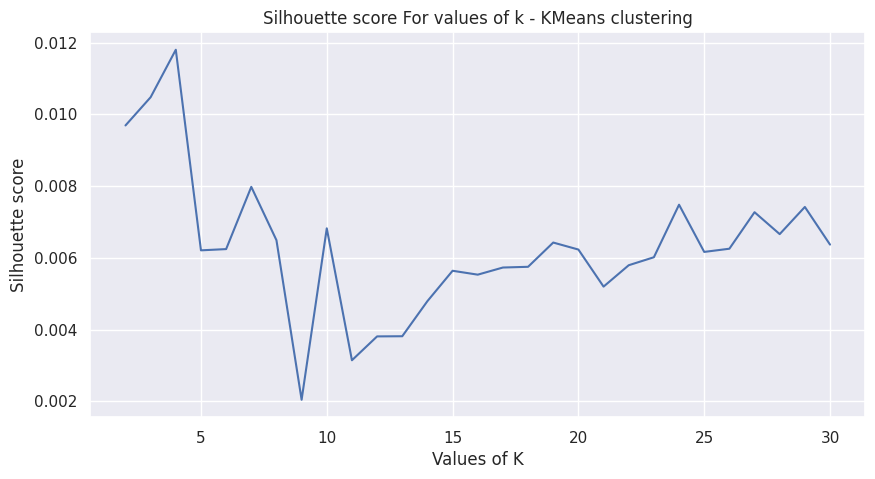

In [ ]:
# Plotting the Sillhouette score graph
plt.figure(figsize=(10,5))
plt.plot(range(2,31),sill_score)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score For values of k - KMeans clustering')
plt.show()

**Higher Silhouette scores indicate better-defined clusters. From the above Silhouette score graph we can se that the highest score is when the value of K is 4. So we will consider the value of K as 4 and proceed further.**

In [ ]:
# Clustering the data into 4 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,init='k-means++',random_state=33)
km.fit(x_pca)

KMeans(n_clusters=4, random_state=33)

**We performed K-means clustering with 4 clusters on the data. init='k-means++': Specifies the initialization method for the initial cluster centroids. 'k-means++' is a smart initialization method that improves convergence.**

In [ ]:
# Evaluation metrics - distortion, Silhouette score
from sklearn.metrics import silhouette_score

kmeans_distortion = km.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, km.labels_)

# Print Silhouette score
print((kmeans_distortion,kmeans_silhouette_score))

(6371.19802610272, 0.004428055660629753)


**The variable kmeans_distortion stores the distortion (inertia) of the K-means clustering algorithm after fitting the data.**

In [ ]:
# Adding a kmeans cluster number attribute
netflix_df['kmeans_cluster'] = km.labels_

In [ ]:
# Value counts
netflix_df['kmeans_cluster'].value_counts()

2    3008
0    2383
1    1256
3    1140
Name: kmeans_cluster, dtype: int64

Text(0.5, 1.0, 'Number of movies and TV shows in each cluster - Kmeans Clustering')

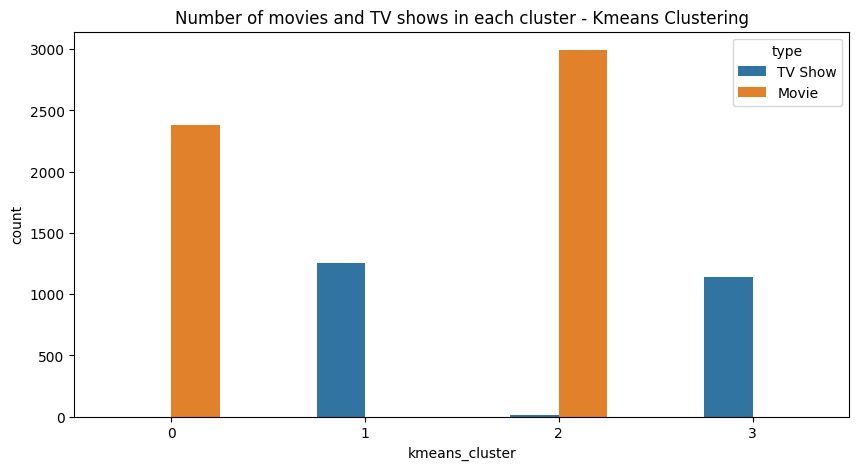

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=netflix_df, hue='type', width = 0.5)
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

**It visualizes the number of movies and TV shows in each cluster using a countplot. the value counts of each cluster are displayed, indicating the number of instances in each cluster.**


In [ ]:
# Reducing the dimensionality of the data to visualize it in a two-dimensional space.
from sklearn.manifold import TSNE

# Applying t-SNE dimensionality reduction
x_embedded = TSNE(n_components=2).fit_transform(x_pca)

# Shape
x_embedded.shape

(7787, 2)

**The above code uses t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the data from the original high-dimensional space to a two-dimensional space. We reduced our data to two-dimension and plotted a K Means clustering Scatter Plot**

In [ ]:
# Create a DataFrame with the embedded data and cluster labels
df_plot = pd.DataFrame({'Dimension 1': x_embedded[:, 0],
                        'Dimension 2': x_embedded[:, 1],
                        'Cluster': km.labels_})

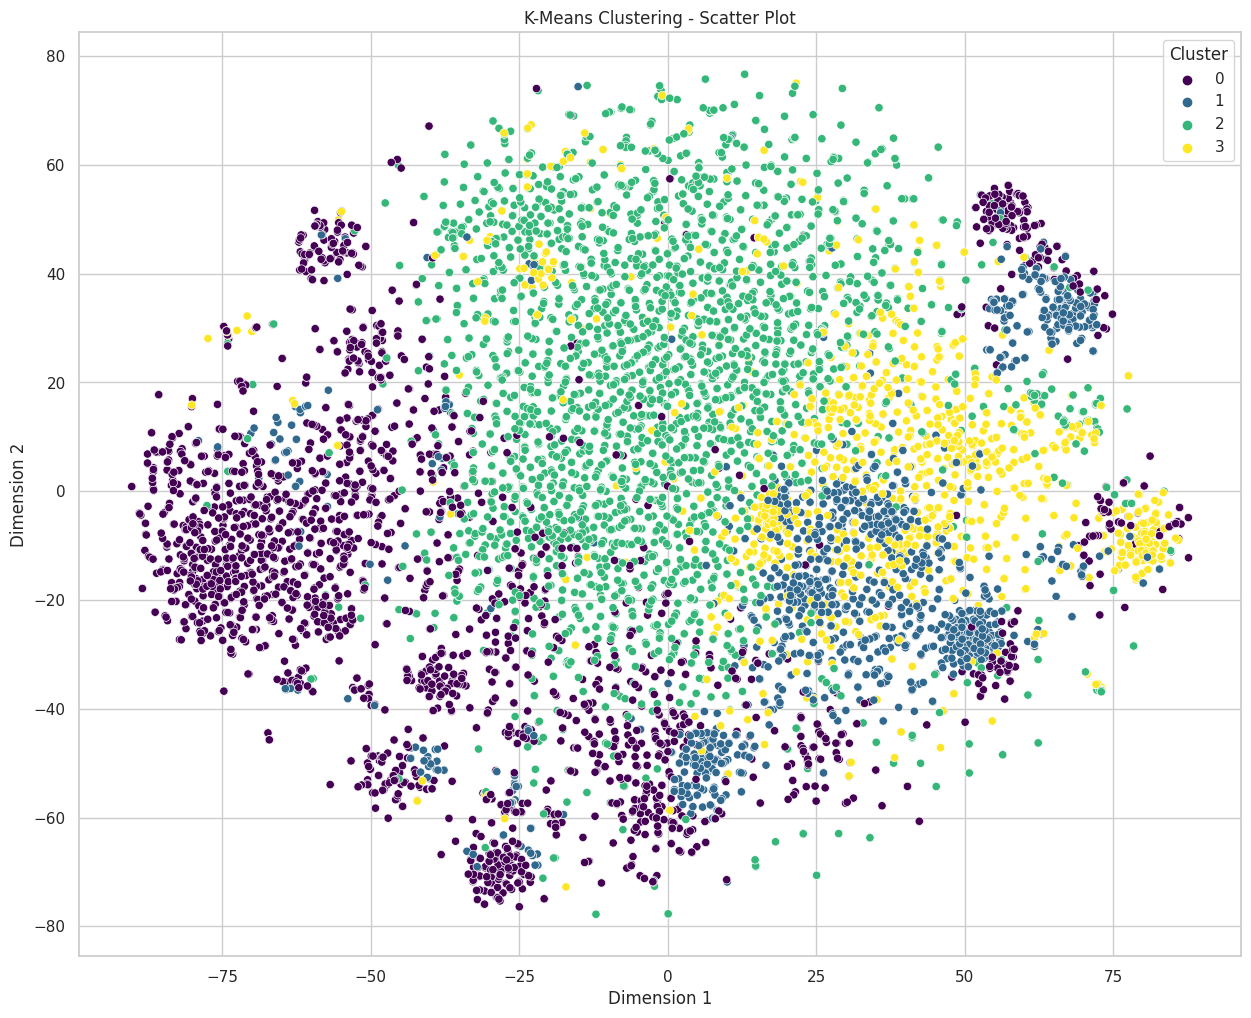

In [ ]:
# Set the style of the plot
sns.set(style='whitegrid')
plt.figure(figsize=(15, 12))

# Create the scatter plot using Seaborn
sns.scatterplot(data=df_plot, x='Dimension 1', y='Dimension 2', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering - Scatter Plot")
plt.show()

In conclusion, our K-means clustering analysis on the Netflix dataset revealed that there were no clear optimal number of clusters based on the WCSS plot. However, the Silhouette scores indicated that the best clustering solution was obtained with 4 clusters. The resulting clusters showed varying sample sizes, and visualizations helped us gain insights into the distribution of movies and TV shows within each cluster.

### **ML Model - 2 - Hierarchical Clustering**

Text(0, 0.5, 'Distance')

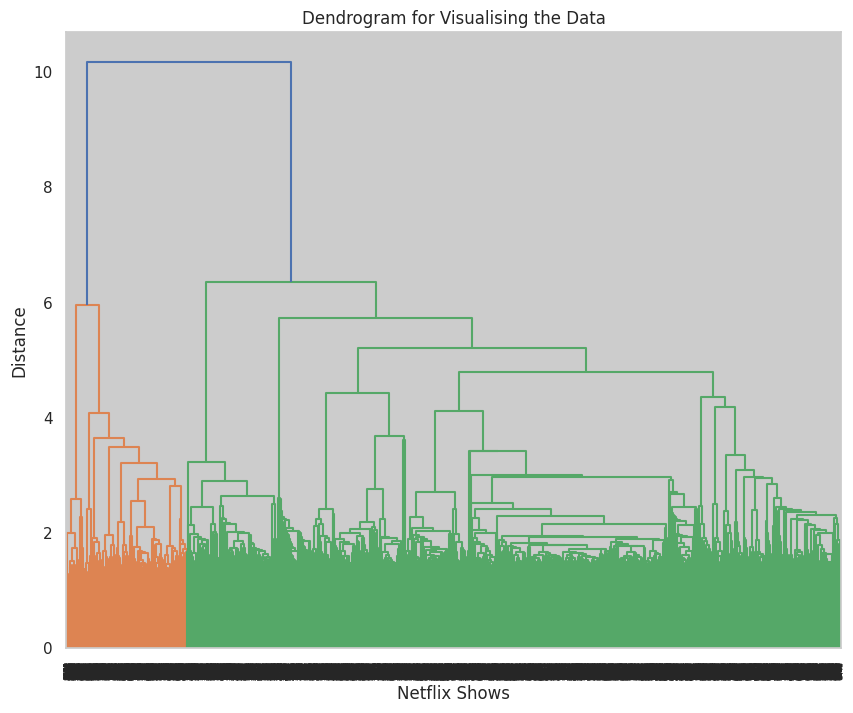

In [ ]:
# Creating a Dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(10, 8))
Dendrogram = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram for Visualising the Data')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')

**We created a dendogram to decide the number of clusters. A dendrogram is a diagram used to visualize hierarchical clustering results. It is a tree-like structure that shows the arrangement of the clusters produced by hierarchical clustering algorithms.**

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg_clustering.fit(x_pca)

AgglomerativeClustering(affinity='euclidean')

**The longest vertical line that does not intersect with any other cluster has 2 clusters, so we took the value of K as 2**

In [ ]:
# Adding a hierarchical cluster number attribute to predict the model
netflix_df['hierarchical_cluster'] = agg_clustering.labels_

In [ ]:
netflix_df['hierarchical_cluster'].value_counts()

0    6568
1    1219
Name: hierarchical_cluster, dtype: int64

Text(0.5, 1.0, 'Number of movies and tv shows in each cluster - Hierarchical Clustering')

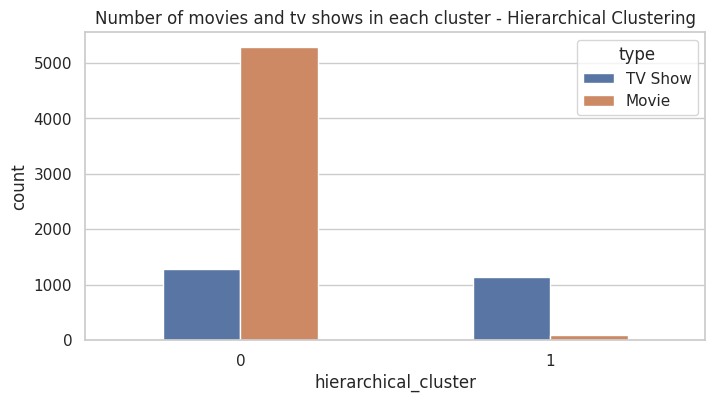

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,4))
q = sns.countplot(x='hierarchical_cluster',data=netflix_df, hue='type', width = 0.5)
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

**It visualizes the number of movies and TV shows in each cluster using a countplot. the value counts of each cluster are displayed, indicating the number of instances in each cluster.**

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(x_pca, netflix_df['hierarchical_cluster'], metric='euclidean')

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.001152080226509137


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin score
davies_bouldin = davies_bouldin_score(x_pca, netflix_df['hierarchical_cluster'])

# Print the Davies-Bouldin score
print("Davies-Bouldin Score:", davies_bouldin)

Davies-Bouldin Score: 7.985321799750311


In [ ]:
# Create a DataFrame with the embedded data and cluster labels
df_plot_2 = pd.DataFrame({'Dimension 1': x_embedded[:, 0],
                        'Dimension 2': x_embedded[:, 1],
                        'Cluster': agg_clustering.labels_})

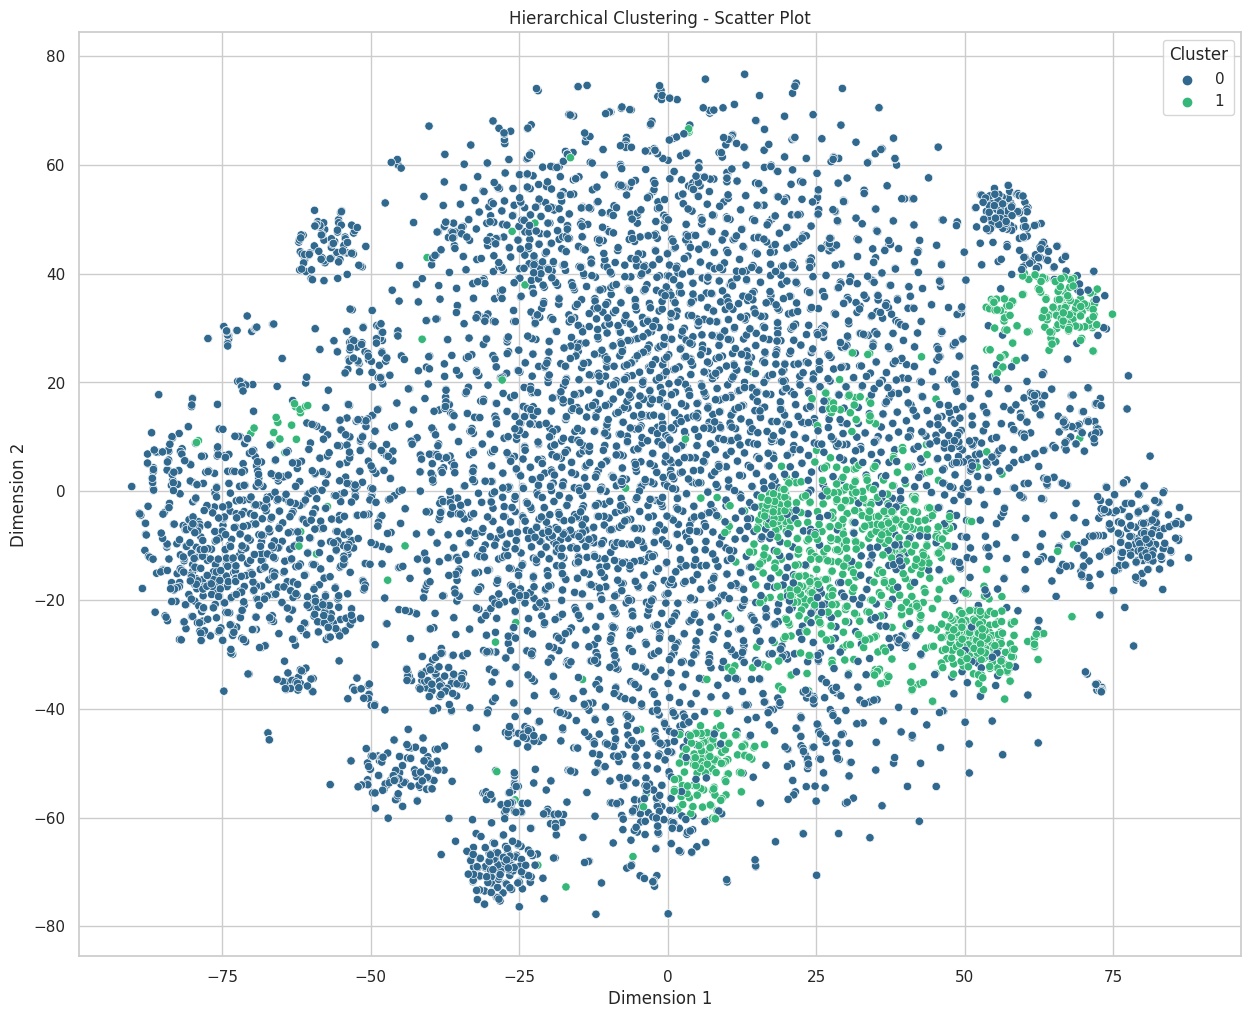

In [ ]:
# Set the style of the plot
sns.set(style='whitegrid')
plt.figure(figsize=(15, 12))

# Create the scatter plot using Seaborn
sns.scatterplot(data=df_plot_2, x='Dimension 1', y='Dimension 2', hue='Cluster', palette='viridis')
plt.title("Hierarchical Clustering - Scatter Plot")
plt.show()

Based on the hierarchical clustering analysis, we used a dendrogram to determine the number of clusters and selected 2 clusters for further analysis. The resulting clusters were assigned to the Netflix dataset, with Cluster 0 having 6568 observations and Cluster 1 having 1219 observations. The bar graph showed the distribution of movies and TV shows in each cluster. The silhouette score indicated the overall quality of the clustering. Additionally, a scatter plot visualized the data in a two-dimensional space based on the hierarchical clustering results.

# **Conclusion**

In this project, the dataset consisted mostly of text data with a few categorical columns and one numerical column (release year). The process began with importing the necessary libraries, loading the dataset, and performing data wrangling tasks. Exploratory data analysis (EDA) was then conducted, including 15 visualization plots for univariate and bivariate analysis.

Two hypothesis tests were performed by assuming null and alternative hypotheses. Moving forward, feature engineering and data pre-processing were carried out. This involved handling missing values, clustering attributes into a single column, and removing non-ASCII characters. Textual data pre-processing techniques were applied, such as expanding contractions, lowercasing, removing punctuation, URLs, words and digits containing digits, stopwords, and whitespace. Lemmatization, tokenization, and text vectorization techniques were also utilized. Before proceeding with clustering, dimensionality reduction techniques were applied to reduce the dataset's dimensionality.

In clustering, first the data was clustered using the k-means algorithm, and the optimal number of clusters was determined using techniques such as the elbow method and silhouette scores(K=4). The resulting clusters had varying sample sizes, with Cluster 2 having the highest number of samples (3008), followed by Cluster 0 (2383), Cluster 1 (1256), and Cluster 3 (1140).

Secondly the data was using clustered Agglomerative Clustering, we created a dendrogram to determine the optimal number of clusters and based on the dendrogram, we selected 2 clusters for further analysis. Using the AgglomerativeClustering algorithm with Euclidean distance and Ward linkage, we fitted the data and assigned hierarchical cluster numbers to each observation. The resulting distribution of observations among the clusters was as follows: Cluster 0 contained 6568 observations, and Cluster 1 contained 1219 observations.

The key insights about the Netflix Dataset are -

* The dataset primarily consists of textual data, with a few categorical and numerical columns.
* Exploratory data analysis revealed various interesting patterns and relationships within the dataset, as showcased through 15 visualization plots.
* The main insights from EDA were that netflix is home to a vast collection of content, and upon analyzing the dataset, it became evident that movies dominate the platform, outnumbering TV shows.
* A significant portion of the shows originates from the United States, suggesting a strong presence of American productions.
* A decision was made to cluster the data by considering key attributes such as type, director, cast, country, genre, and description. To facilitate this process, these attribute values underwent tokenization, preprocessing, and subsequent vectorization using the TFIDF vectorizer. Further, we used Principal Component Analysis (PCA) to handle the curse of dimensionality.
* Utilizing the k-means clustering algorithm, we identified the optimal number of clusters as 4, employing the elbow method and Silhouette score analysis.
* Subsequently, the Agglomerative clustering algorithm was applied, revealing the optimal number of clusters as 12, which was determined through careful examination of the dendrogram visualization.
* This comprehensive clustering analysis provided valuable insights into the underlying patterns and structures within the Netflix dataset, offering a deeper understanding of the content and its categorization.

Overall, these insights can aid Netflix in content acquisition, content recommendation systems, and strategic decision-making. By leveraging data-driven insights, Netflix can enhance user satisfaction, improve content offerings, and stay competitive in the ever-evolving streaming industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***